<a href="https://colab.research.google.com/github/ash097/test_reop/blob/master/My_ML_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt



In [2]:
# Read in the insuarance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
inse_one_hot=pd.get_dummies(insurance)
inse_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [7]:
from pandas._libs.tslibs.timestamps import integer_op_not_supported
# Create X & y values(features and labels)
X = inse_one_hot.drop("charges",axis=1)
y = inse_one_hot["charges"]

In [10]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [11]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [12]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [14]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,63,35.090,0,0,1,0,1,0,0,1,0
575,58,27.170,0,1,0,1,0,0,1,0,0
535,38,28.025,1,0,1,1,0,1,0,0,0
543,54,47.410,0,1,0,0,1,0,0,1,0


In [15]:
tf.random.set_seed(42)

In [20]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

9/9 [==============================] - 0s 2ms/step - loss: 3373.0723 - mae: 3373.0723


[3373.072265625, 3373.072265625]

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10)
    
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])

history = model.fit(X_train,y_train, epochs =200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 0s 2ms/step - loss: 10172.3057 - mae: 10172.3057
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7367.5449 - mae: 7367.5449
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 6982.7949 - mae: 6982.7949
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 6593.4189 - mae: 6593.4189
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6408.2852 - mae: 6408.2852
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6120.5034 - mae: 6120.5034
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 5791.1021 - mae: 5791.1021
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 5287.7544 - mae: 5287.7544
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 4252.1128 - mae: 4252.1128
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3871.5637 - mae: 3871.5637
Epoch 11/

In [37]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3176.6917 - mae: 3176.6917


[3176.691650390625, 3176.691650390625]

In [42]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])


model_1.fit(X_train,y_train , epochs = 200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 12991.7764 - mae: 12991.7764
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 10462.7344 - mae: 10462.7344
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7639.0625 - mae: 7639.0625
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7424.8530 - mae: 7424.8530
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7350.0684 - mae: 7350.0684
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7286.9224 - mae: 7286.9224
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7203.9058 - mae: 7203.9058
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7128.9272 - mae: 7128.9272
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7048.5435 - mae: 7048.5435
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6965.1157 - mae: 6965.

In [43]:
model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3174.9343 - mae: 3174.9343


[3174.934326171875, 3174.934326171875]

Text(0.5, 0, 'epochs')

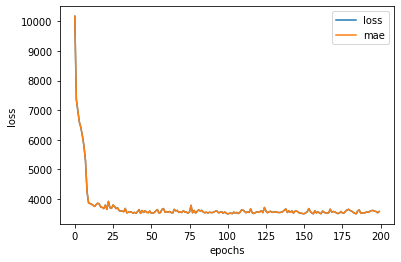

In [48]:
# plot history (also known as loss curve or a training cure)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")